# **Preprocessing the Data**

## **Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
sns.set()
from google.colab import files

## **Importing the Data**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
raw_data = pd.read_csv('/content/gdrive/MyDrive/INDUSTOWER.NS(2008-).csv')

In [ ]:
df_copy = raw_data.copy()

## **Examining the Data**

In [ ]:
df_copy.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-12-31,191.850006,195.500000,188.250000,193.699997,134.990921,6021827.0
1,2013-01-01,194.699997,199.800003,194.000000,197.750000,137.813385,2619486.0
2,2013-01-02,198.300003,204.350006,197.000000,201.500000,140.426773,5470399.0
3,2013-01-03,200.000000,206.500000,200.000000,204.350006,142.412949,3626134.0
4,2013-01-04,205.000000,210.000000,202.350006,207.149994,144.364273,4188477.0


In [ ]:
df_copy.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2.124000e+03
mean,288.347811,293.685734,282.902872,288.109699,228.838739,3.712484e+06
std,82.996087,84.186916,81.523736,82.749021,61.125608,6.792973e+06
min,124.199997,134.800003,120.050003,124.050003,92.849159,0.000000e+00
25%,223.000000,227.987499,216.687500,222.537506,190.414844,1.069322e+06
50%,278.625000,282.850006,272.024994,277.724991,236.054169,2.044296e+06
75%,364.862503,370.924996,358.049988,364.300003,274.167877,3.882003e+06
max,483.000000,499.649994,472.799988,482.299988,377.159058,1.313354e+08


In [ ]:
df_copy.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [ ]:
df_copy.isna().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

## **Examine the length of time period**

In [ ]:
df_copy.Date.describe()

count           2128
unique          2128
top       2021-01-15
freq               1
Name: Date, dtype: object

In [ ]:
## Changing text to date
df_copy.Date = pd.to_datetime(df_copy.Date,dayfirst = True)

In [ ]:
df_copy.Date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    2128
unique                   2128
top       2018-01-05 00:00:00
freq                        1
first     2012-12-31 00:00:00
last      2021-08-13 00:00:00
Name: Date, dtype: object

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2128 non-null   datetime64[ns]
 1   Open       2124 non-null   float64       
 2   High       2124 non-null   float64       
 3   Low        2124 non-null   float64       
 4   Close      2124 non-null   float64       
 5   Adj Close  2124 non-null   float64       
 6   Volume     2124 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 116.5 KB


## **Indexing the dataset**

In [ ]:
df_copy.set_index('Date', inplace=True)


In [ ]:
df_copy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-31,191.850006,195.500000,188.250000,193.699997,134.990921,6021827.0
2013-01-01,194.699997,199.800003,194.000000,197.750000,137.813385,2619486.0
2013-01-02,198.300003,204.350006,197.000000,201.500000,140.426773,5470399.0
2013-01-03,200.000000,206.500000,200.000000,204.350006,142.412949,3626134.0
2013-01-04,205.000000,210.000000,202.350006,207.149994,144.364273,4188477.0


In [ ]:
df_copy = df_copy.asfreq(freq = 'B') 
 ## 'b' indicates that daily data were collected and moreover only business days were considered.

In [ ]:
df_copy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-31,191.850006,195.500000,188.250000,193.699997,134.990921,6021827.0
2013-01-01,194.699997,199.800003,194.000000,197.750000,137.813385,2619486.0
2013-01-02,198.300003,204.350006,197.000000,201.500000,140.426773,5470399.0
2013-01-03,200.000000,206.500000,200.000000,204.350006,142.412949,3626134.0
2013-01-04,205.000000,210.000000,202.350006,207.149994,144.364273,4188477.0


## **Taking care of missing values**

**Method 1: Front Filling**(assigns value of the previous period) <br>
code: df = df.fillna(method="ffill")<br>
**Method 2: Back Filling** (assign values of the later period)<br>
code: df = df.fillna(method="bfill")



In [ ]:
df_copy.isnull().sum()

Open         126
High         126
Low          126
Close        126
Adj Close    126
Volume       126
dtype: int64

In [ ]:
## Using front filling 
df_copy= df_copy.fillna(method ="ffill")

In [ ]:
df_copy.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## **Plotting the Data**

Text(0.5, 1.0, 'Closing Stock Price')

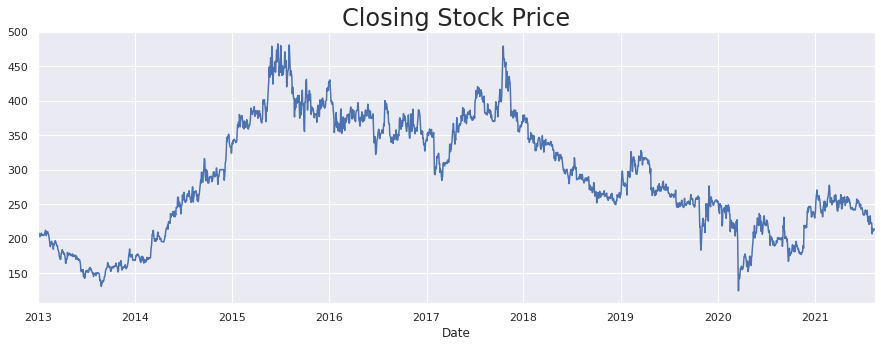

In [ ]:
df_copy.Close.plot(figsize=(15,5))
plt.title('Closing Stock Price',size=24)

## **Simplifying the Dataset**

In [ ]:
df_copy['Market Value']= df_copy.Close

In [ ]:
df_copy.head()

,Open,High,Low,Close,Adj Close,Volume,Market Value
Date,,,,,,,
2012-12-31,191.850006,195.500000,188.250000,193.699997,134.990921,6021827.0,193.699997
2013-01-01,194.699997,199.800003,194.000000,197.750000,137.813385,2619486.0,197.750000
2013-01-02,198.300003,204.350006,197.000000,201.500000,140.426773,5470399.0,201.500000
2013-01-03,200.000000,206.500000,200.000000,204.350006,142.412949,3626134.0,204.350006
2013-01-04,205.000000,210.000000,202.350006,207.149994,144.364273,4188477.0,207.149994


In [ ]:
del df_copy['Open'], df_copy['High'], df_copy['Low'], df_copy['Adj Close'], df_copy['Volume'],df_copy['Close']

In [ ]:
df_copy.head()

,Market Value
Date,
2012-12-31,193.699997
2013-01-01,197.750000
2013-01-02,201.500000
2013-01-03,204.350006
2013-01-04,207.149994


In [ ]:
df_copy.describe()

,Market Value
count,2250.000000
mean,287.966933
std,82.528016
min,124.050003
25%,222.662506
50%,277.824997
75%,364.087501
max,482.299988


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2250 entries, 2012-12-31 to 2021-08-13
Freq: B
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Market Value  2250 non-null   float64
dtypes: float64(1)
memory usage: 35.2 KB


# **Making the Time Series Stationary**

## **Decomposition of Time Series**

In [ ]:
import statsmodels.api as sm

In [ ]:
decompose = sm.tsa.seasonal_decompose(df_copy['Market Value'],model='additive')

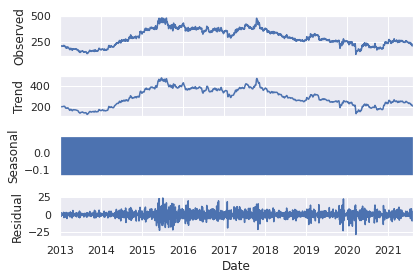

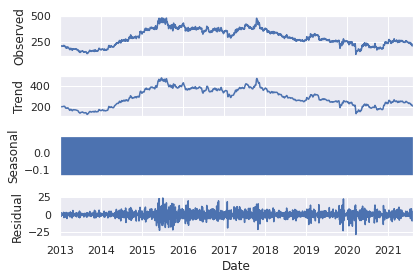

In [ ]:
decompose.plot()

## **Test for Stationarity**

$H_0$: Data is Stationary <br>
$H_1$: Data is Non-Stationary 

In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
kpss = kpss(df_copy['Market Value'],'ct')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [ ]:
kpss

(1.559761625104967,
 0.01,
 27,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

At 5% level p_value = 0.01 < 0.05, so we reject the Null Hypothesis , and conclude that the data is not stationary.

## **Test for Existence of Trend**

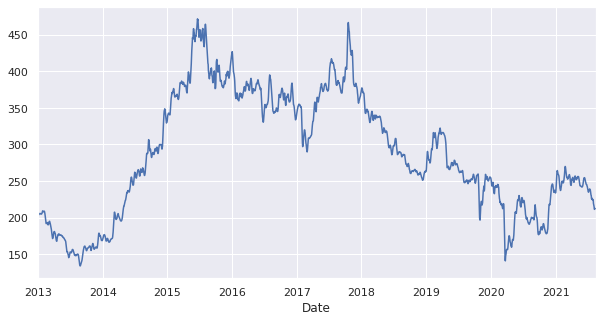

In [ ]:
## Plotting the trend part from the decomposed series 
decompose.trend.plot(figsize=(10,5))

$H_0$: Data Has no trend<br>
$H_1$: Trend Exists 

In [ ]:
pip install pymannkendall

In [ ]:
## Mann-Kendall Test 
import pymannkendall as mk

In [ ]:
mk_test = mk.original_test(df_copy['Market Value'])

In [ ]:
mk_test

Mann_Kendall_Test(trend='decreasing', h=True, p=2.220446049250313e-16, z=-8.237339828394356, Tau=-0.11586265500716368, s=-293147.0, var_s=1266467295.0, slope=-0.03409354387990764, intercept=316.16318709295615)

p_value is small, so we reject Null hypothesis and conclude that trend is significant in the data.

## **Elimination of determininstic component**

In [ ]:
df_diff = df_copy.diff(periods=1)

In [ ]:

df_diff.head()

,Market Value
Date,
2012-12-31,NaN
2013-01-01,4.050003
2013-01-02,3.750000
2013-01-03,2.850006
2013-01-04,2.799988


In [ ]:
df_diff = df_diff[1:] ## Getting rid of the NaN row
df_diff.head()

,Market Value
Date,
2013-01-01,4.050003
2013-01-02,3.750000
2013-01-03,2.850006
2013-01-04,2.799988
2013-01-07,0.250000


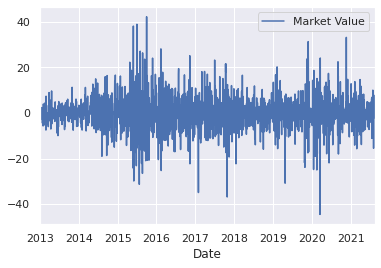

In [ ]:
df_diff.plot()  ##looks stationary

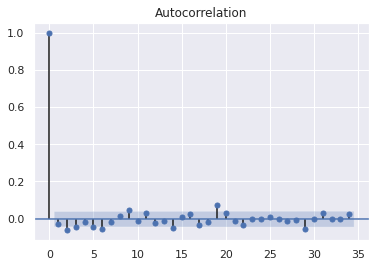

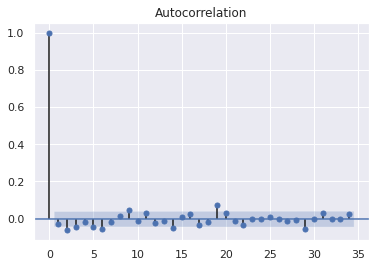

In [ ]:
## ACF plot 
plot_acf(df_diff) ##plot shows stationarity 

In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
kpss(df_diff,'ct')


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.054730066395238766,
 0.1,
 27,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

p_value = 0.1 >0.05, we accept null and conclude that time series is stationary 

In [ ]:
df_stationary = df_diff

## **Splitting the data set**

In [ ]:
len(df_copy)

2250

In [ ]:
size = int(len(df_copy)*0.80)
size

1800

In [ ]:
train = df_copy.iloc[:size]
test = df_copy.iloc[size:]

In [ ]:
train.head(3)

,Market Value
Date,
2012-12-31,193.699997
2013-01-01,197.750000
2013-01-02,201.500000


In [ ]:
train.tail(3)

,Market Value
Date,
2019-11-20,240.899994
2019-11-21,241.899994
2019-11-22,232.000000


In [ ]:
test.tail(3)

,Market Value
Date,
2021-08-11,213.100006
2021-08-12,214.100006
2021-08-13,213.500000


In [ ]:
test.head(2)

,Market Value
Date,
2019-11-25,250.149994
2019-11-26,232.649994


In [ ]:
test.size


450

In [ ]:
train.size


1800

## **Using Returns**

Suppose that the data is given by, $z_t$ ,t=1,...,n. \\
Now consider the return series, relative first order difference given by : <br> $y_t = \frac{y_t -y_{t-1}}{y_t}*100$

In [ ]:
train['Return'] = train['Market Value'].pct_change(1).mul(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train.head()

,Market Value,Return
Date,,
2012-12-31,193.699997,NaN
2013-01-01,197.750000,2.090864
2013-01-02,201.500000,1.896334
2013-01-03,204.350006,1.414395
2013-01-04,207.149994,1.370192


In [ ]:
train_model = train.iloc[1:]

In [ ]:
train_model.head()

,Market Value,Return
Date,,
2013-01-01,197.750000,2.090864
2013-01-02,201.500000,1.896334
2013-01-03,204.350006,1.414395
2013-01-04,207.149994,1.370192
2013-01-07,207.399994,0.120685


In [ ]:
from statsmodels.tsa.stattools import kpss
kpss(train_model.Return,'ct')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.07952696863899576,
 0.1,
 25,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

We made the model stationary.

In [ ]:
test['Return']=test['Market Value'].pct_change(1).mul(100)
test_model = test.iloc[1:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test_model.head()

,Market Value,Return
Date,,
2019-11-26,232.649994,-6.995803
2019-11-27,225.300003,-3.159248
2019-11-28,256.600006,13.892589
2019-11-29,276.299988,7.677312
2019-12-02,265.500000,-3.908791


## **ACF and PACF plot for Return**

Text(0.5, 1.0, 'ACF plot')

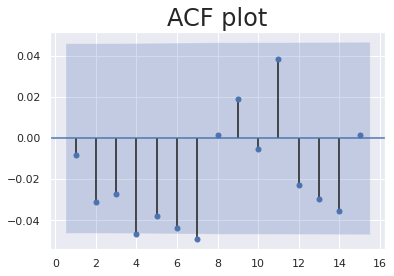

In [ ]:
plot_acf(train_model['Return'],zero=False,lags=15)
plt.title("ACF plot",size=24)

Text(0.5, 1.0, 'PACF plot')

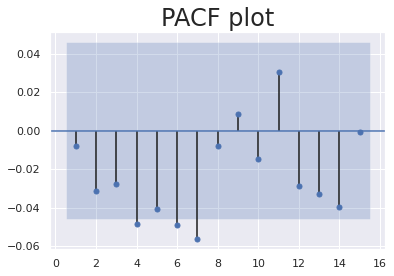

In [ ]:
plot_pacf(train_model['Return'],zero=False, lags=15)
plt.title("PACF plot",size=24)

Indicates lag 4, lag 5 and lag7 shows significant pacfs. So we will consider it and choose the model with lesser AIC and higher Log likelihood. 

## **AR**

$\{y_t\}$ is said to be an AR(p) process if it is given by : 
\begin{align*}
y_t &=  \delta + \phi_1 y_{t-1}+....+\phi_p y_{t-p} & , t=1,2,...,n 
\end{align*}
Here $\{\epsilon_t\}$ is a white noise sequence with $cov(\epsilon_t,y_{t-i}) =0$, for i>0. and $\phi_1,\phi_2,...\phi_p$ are unknown constants.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
model_ar_7 = ARIMA(train_model.Return,order=(8,0,0))
model_ar_7_fit = model_ar_7.fit() 
model_ar_7_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Return   No. Observations:                 1799
Model:                     ARMA(8, 0)   Log Likelihood               -3907.893
Method:                       css-mle   S.D. of innovations              2.124
Date:                Tue, 16 Nov 2021   AIC                           7835.785
Time:                        06:45:18   BIC                           7890.735
Sample:                    01-01-2013   HQIC                          7856.070
                         - 11-22-2019                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0318      0.038      0.828      0.408      -0.043       0.107
ar.L1.Return    -0.0178      0.024     -0.753      0.451      -0.064       0.028
ar.L2.Return    -0.0392      0.024     -1.664      0.096      -0.085       0.007
ar.L3.Return    -0.0338      0.024     -1.435      0.152      -0.080       0.012
ar.L4.Return    -0.0532      0.024     -2.243      0.025      -0.100      -0.007
ar.L5.Return    -0.0447      0.024     -1.884      0.060      -0.091       0.002
ar.L6.Return    -0.0509      0.024     -2.132      0.033      -0.098      -0.004
ar.L7.Return    -0.0573      0.024     -2.400      0.016      -0.104      -0.011
ar.L8.Return    -0.0077      0.024     -0.320      0.749      -0.055       0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1692           -0.6986j            1.3620           -0.0857
AR.2            1.1692           +0.6986j            1.3620            0.0857
AR.3            0.2753           -1.5095j            1.5344           -0.2213
AR.4            0.2753           +1.5095j            1.5344            0.2213
AR.5           -1.0258           -1.2514j            1.6181           -0.3593
AR.6           -1.0258           +1.2514j            1.6181            0.3593
AR.7           -1.7337           -0.0000j            1.7337           -0.5000
AR.8           -6.5869           -0.0000j            6.5869           -0.5000
-----------------------------------------------------------------------------
"""

We stick to AR(7)

### **Analyze the Residuals**

In [ ]:
train_model['Residual']=model_ar_7_fit.resid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Residuals of AR(7)')

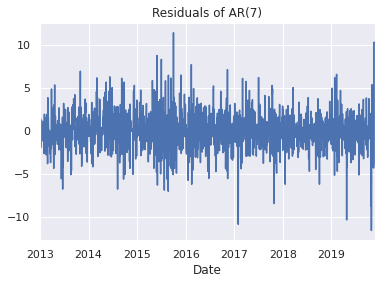

In [ ]:
train_model.Residual.plot()
plt.title('Residuals of AR(7)')

In [ ]:
train_model.Residual.mean()  ## Very close to 0

0.0007816973303369503

In [ ]:
train_model.Residual.var()

4.514247959249009

In [ ]:
from statsmodels.tsa.stattools import kpss
kpss(train_model.Residual,'ct')  ## stationary

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.08841715504434364,
 0.1,
 25,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

Majority of points lies inside the blue area. The existence of some points outside the area indicates there exists better predictor.

## **MA Model**

$\{y_t\}$ is said to be an MA(q) process if it is given by : 
\begin{align*}
y_t &=  \epsilon_t + \theta_1\epsilon_{t-1}+....+\theta_q\epsilon_{t-q} & , t=1,2,...,n 
\end{align*}
Here $\{\epsilon_t\}$ is a white noise sequence and $\theta_1,\theta_2,...\theta_q$ are unknown constants.

In [ ]:
from statsmodels.tsa.arima_model import ARMA


In [ ]:
train['Return'] = train['Market Value'].pct_change(1).mul(100)
train_model = train.iloc[1:]
test['Return'] = test['Market Value'].pct_change(1).mul(100)
test_model = test.iloc[1:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'ACF plot')

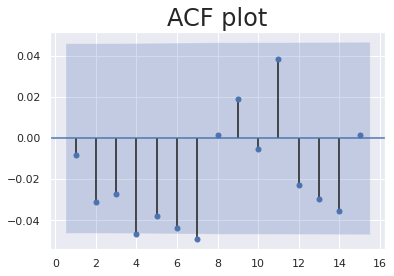

In [ ]:
plot_acf(train_model['Return'],zero=False,lags=15)
plt.title("ACF plot",size=24)

Text(0.5, 1.0, 'PACF plot')

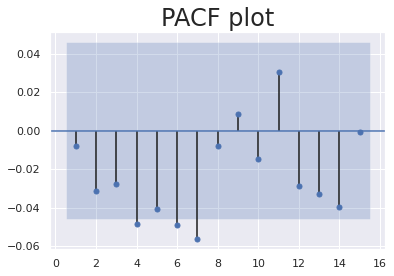

In [ ]:
plot_pacf(train_model['Return'],zero=False,lags=15)
plt.title("PACF plot",size=24)

In [ ]:
model_ma_8 = ARMA(train_model.Return,order=(0,8))
model_ma_8_fit = model_ma_8.fit() 
model_ma_8_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Return   No. Observations:                 1799
Model:                     ARMA(0, 8)   Log Likelihood               -3907.689
Method:                       css-mle   S.D. of innovations              2.124
Date:                Tue, 16 Nov 2021   AIC                           7835.378
Time:                        05:47:59   BIC                           7890.328
Sample:                    01-01-2013   HQIC                          7855.663
                         - 11-22-2019                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0315      0.036      0.870      0.384      -0.039       0.102
ma.L1.Return    -0.0180      0.024     -0.763      0.446      -0.064       0.028
ma.L2.Return    -0.0377      0.024     -1.600      0.110      -0.084       0.008
ma.L3.Return    -0.0327      0.024     -1.376      0.169      -0.079       0.014
ma.L4.Return    -0.0477      0.024     -1.996      0.046      -0.095      -0.001
ma.L5.Return    -0.0399      0.024     -1.657      0.098      -0.087       0.007
ma.L6.Return    -0.0473      0.024     -1.943      0.052      -0.095       0.000
ma.L7.Return    -0.0536      0.025     -2.171      0.030      -0.102      -0.005
ma.L8.Return    -0.0020      0.023     -0.084      0.933      -0.048       0.044
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.2941           -0.0000j            1.2941           -0.0000
MA.2            0.8317           -1.2428j            1.4954           -0.1561
MA.3            0.8317           +1.2428j            1.4954            0.1561
MA.4           -0.4251           -1.5204j            1.5787           -0.2934
MA.5           -0.4251           +1.5204j            1.5787            0.2934
MA.6           -1.4960           -0.6599j            1.6351           -0.4339
MA.7           -1.4960           +0.6599j            1.6351            0.4339
MA.8          -26.2056           -0.0000j           26.2056           -0.5000
-----------------------------------------------------------------------------
"""

We stick to MA(7) model.

### **Analyze the Residuals**

In [ ]:
train_model['Residual']=model_ma_7_fit.resid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Residuals of MA(7)')

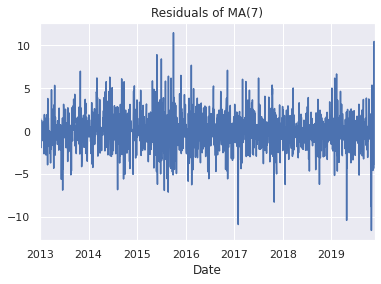

In [ ]:
train_model.Residual.plot()
plt.title('Residuals of MA(7)')

In [ ]:
train_model.Residual.mean()  ## Very close to 0

0.000994358459320636

In [ ]:
train_model.Residual.var()

4.512978197005697

In [ ]:
from statsmodels.tsa.stattools import kpss
kpss(train_model.Residual,'ct')  ## stationary

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.09385281214369766,
 0.1,
 25,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

## **ARIMA Model**

$\{y_t\}$ is said to follow an ARIMA(p,d,q) model if ,
$z_t = \nabla^d y_t = (1-B)^d y_t $ and $z_t$ follows an ARMA(p,q) process.<br>
\begin{align*}
z_t &= \phi_1z_{t-1} + ....+\phi_pz_{t-p} +\epsilon_t+\theta_1\epsilon_{t-1}+....+\theta_q\epsilon_{t-q}
\end{align*}
,where ${\epsilon_t}$ is a white noise sequence. $\phi_1,...,\phi_p$ are AR parameters and $\theta_1,...,\theta_q$ are MA parameters.

In [ ]:
pip install pmdarima

In [ ]:
train['Return'] = train['Market Value'].pct_change(1).mul(100)
train_model = train.iloc[1:]
test['Return'] = test['Market Value'].pct_change(1).mul(100)
test_model = test.iloc[1:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
import pmdarima as pm

In [ ]:
model_arima = pm.auto_arima(train_model.Return, error_action='ignore',trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=7830.881, Time=3.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7840.621, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=7842.498, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=7842.490, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7839.047, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=7844.295, Time=1.35 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=7830.781, Time=1.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=7831.239, Time=1.19 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=7842.734, Time=0.27 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=7832.058, Time=1.53 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=7843.357, Time=0.35 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=7834.781, Time=2.45 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=7829.578, Time=0.32 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=7830.052, Time=0.38 sec
 ARIMA(2,0,0)(0,0,0)[0]          

In [ ]:
model_arima_fit=model_arima.fit(train_model.Return)

model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1799
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -3910.789
Date:                Tue, 16 Nov 2021   AIC                           7829.578
Time:                        05:49:47   BIC                           7851.558
Sample:                             0   HQIC                          7837.692
                               - 1799                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8516      0.058     14.599      0.000       0.737       0.966
ar.L2         -0.0398      0.021     -1.916      0.055      -0.081       0.001
ma.L1         -0.8672      0.057    -15.346      0.000      -0.978      -0.756
sigma2         4.5260      0.096     47.316      0.000       4.339       4.713
===================================================================================
Ljung-Box (Q):                       42.29   Jarque-Bera (JB):               736.58
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                            -0.00
Prob(H) (two-sided):                  0.04   Kurtosis:                         6.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Optimum model has been chosen to be (2,0,1)

**Residual Analysis**

In [ ]:
train_model['Residual']=model_ma_7_fit.resid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Residuals of ARIMA(2,0,1)')

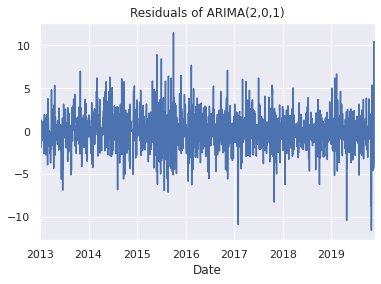

In [ ]:
train_model.Residual.plot()
plt.title('Residuals of ARIMA(2,0,1)')

## **Model Prediction**

In [ ]:
train['Return'] = train['Market Value'].pct_change(1).mul(100)
train_model = train.iloc[1:]
test['Return'] = test['Market Value'].pct_change(1).mul(100)
test_model = test.iloc[1:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
test.head(3)

,Market Value,Return
Date,,
2019-11-25,250.149994,NaN
2019-11-26,232.649994,-6.995803
2019-11-27,225.300003,-3.159248


In [ ]:
test_model.tail(2)

,Market Value,Return
Date,,
2021-08-12,214.100006,0.469263
2021-08-13,213.500000,-0.280246


In [ ]:
train_model.head()

,Market Value,Return
Date,,
2013-01-01,197.750000,2.090864
2013-01-02,201.500000,1.896334
2013-01-03,204.350006,1.414395
2013-01-04,207.149994,1.370192
2013-01-07,207.399994,0.120685


In [ ]:
start_date = '2019-11-25'
end_date = '2021-08-13'

### **AR**

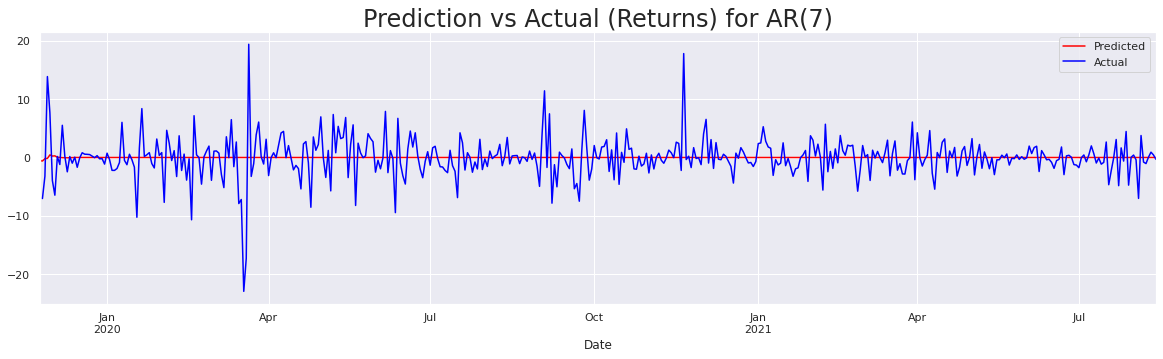

In [ ]:
model_ar_7 = ARIMA(train_model.Return,order=(7,0,0))
model_ar_7_fit = model_ar_7.fit() 
pred_ar = model_ar_7_fit.predict(start=start_date,end=end_date)
pred_ar[start_date:end_date].plot(figsize=(20,5),color="red")
test.Return[start_date:end_date].plot(color="blue")
plt.title("Prediction vs Actual (Returns) for AR(7)",size=24)
plt.legend(['Predicted','Actual'],loc = "upper right")  
plt.show()

## **MA**

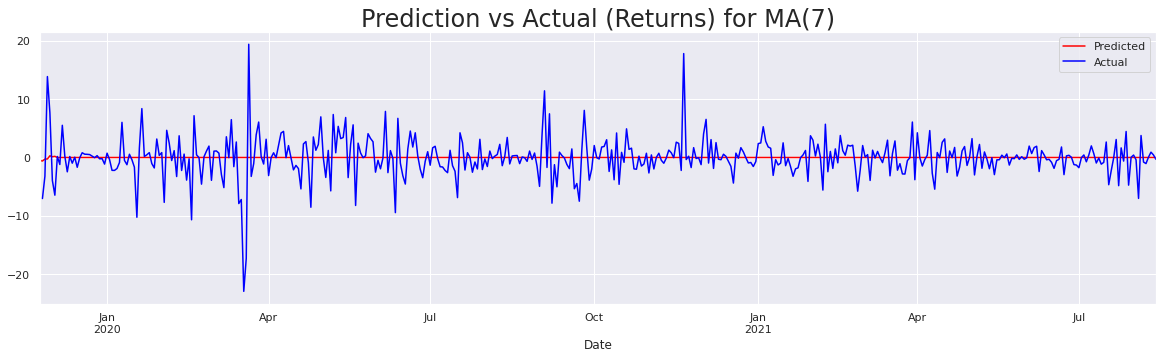

In [ ]:
model_ma_7 = ARMA(train_model.Return,order=(0,7))
model_ma_7_fit = model_ma_7.fit() 
pred_ma = model_ma_7_fit.predict(start=start_date,end=end_date)
pred_ma[start_date:end_date].plot(figsize=(20,5),color="red")
test.Return[start_date:end_date].plot(color="blue")
plt.title("Prediction vs Actual (Returns) for MA(7)",size=24)
plt.legend(['Predicted','Actual'],loc = "upper right")  
plt.show()

### **ARIMA**

In [ ]:
model_arima = pm.auto_arima(train_model.Return, error_action='ignore')
model_arima_fit=model_arima.fit(test_model.Return)


In [ ]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  449
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1195.844
Date:                Tue, 16 Nov 2021   AIC                           2399.689
Time:                        05:26:20   BIC                           2416.117
Sample:                             0   HQIC                          2406.164
                                - 449                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7093      0.189      3.749      0.000       0.338       1.080
ar.L2         -0.0565      0.042     -1.342      0.180      -0.139       0.026
ma.L1         -0.7486      0.195     -3.848      0.000      -1.130      -0.367
sigma2        12.0459      0.365     33.004      0.000      11.331      12.761
===================================================================================
Ljung-Box (Q):                       25.72   Jarque-Bera (JB):              1599.21
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
arima_pred = pd.DataFrame(model_arima_fit.predict(n_periods=450),index=test.index)
arima_pred.head()

,0
Date,
2019-11-25,0.001544
2019-11-26,0.016928
2019-11-27,0.011920
2019-11-28,0.007499
2019-11-29,0.004646


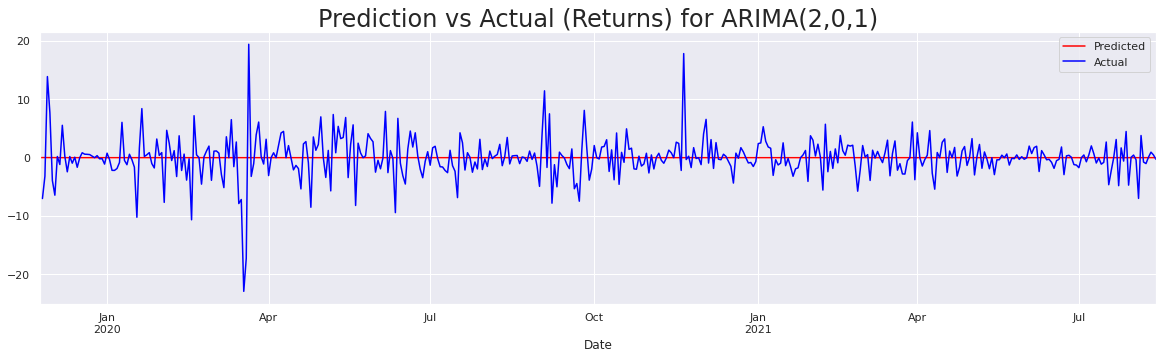

In [ ]:
arima_pred.plot(figsize=(20,5),color="red")
test.Return[start_date:end_date].plot(color="blue")
plt.title("Prediction vs Actual (Returns) for ARIMA(2,0,1)",size=24)
plt.legend(['Predicted','Actual'],loc = "upper right")         
plt.show()

## **Model Volatility Prediction**

In [ ]:
pip install arch

In [ ]:
from arch import arch_model

In [ ]:
df_copy['Return'] = df_copy['Market Value'].pct_change(1).mul(100)

In [ ]:
import arch.__future__


In [ ]:
from arch.__future__ import reindexing

## **Hybrid ARCH-ARIMA**

$H_{0}$ : No arch effect in ARIMA residual<br>
$H_{1}$ : arch effect present

In [ ]:
model_arima_full = pm.auto_arima(df_copy.Return[1:], error_action='ignore')
model_arima_full_fit=model_arima.fit(df_copy.Return[1:])

In [ ]:
Residual = model_arima_full_fit.resid()

## **Test for ARCH-Effect**

In [ ]:
from statsmodels.stats.diagnostic import het_arch

In [ ]:
het_arch(Residual)

(407.24315670941206,
 1.6703326457473186e-69,
 18.23510261165626,
 1.4444690348415081e-77)

p_value is small , so arch effect is present. 

ACF plot of squared residual 

Text(0.5, 1.0, 'ARIMA(2,0,1) ACF plot for Squared Residuals')

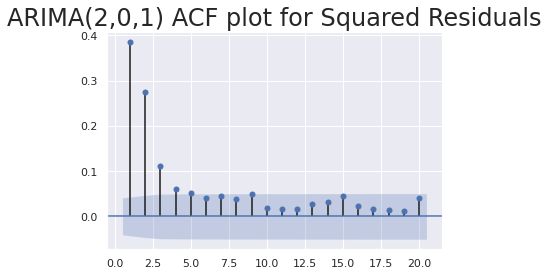

In [ ]:
plot_acf(Residual**2,zero=False,lags=20)
plt.title("ARIMA(2,0,1) ACF plot for Squared Residuals",size=24)

### **PACF plot for squared residual**

Text(0.5, 1.0, 'ARIMA(2,0,1) PACF plot for Squared Residuals')

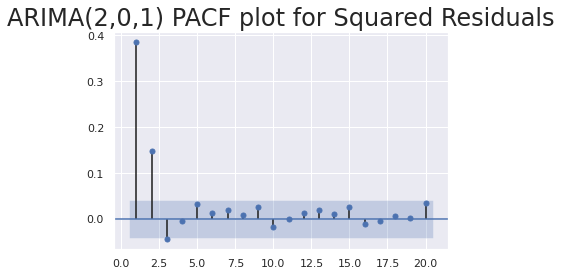

In [ ]:
plot_pacf(Residual**2,zero=False,lags=20)
plt.title("ARIMA(2,0,1) PACF plot for Squared Residuals",size=24)

In [ ]:
Residual = pd.DataFrame(Residual,index=df_copy[1:].index,columns=['ARIMA_Residual'])
Residual.head()

,ARIMA_Residual
Date,
2013-01-01,2.090864
2013-01-02,1.942753
2013-01-03,1.569001
2013-01-04,1.599151
2013-01-07,0.395508


## **ARCH Model**

In [ ]:
arch_full_1 =  arch_model(Residual.ARIMA_Residual, mean = "Constant", vol = "ARCH", p = 6)
results_arch_full_1= arch_full_1.fit(last_obs='2019-11-25',update_freq=5)



Iteration:      5,   Func. Count:     57,   Neg. LLF: 3844.337348937227
Iteration:     10,   Func. Count:    114,   Neg. LLF: 3842.4997757191904
Iteration:     15,   Func. Count:    168,   Neg. LLF: 3842.427142587755
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3842.4271253021543
            Iterations: 16
            Function evaluations: 178
            Gradient evaluations: 16


In [ ]:
results_arch_full_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:         ARIMA_Residual   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3842.43
Distribution:                  Normal   AIC:                           7700.85
Method:            Maximum Likelihood   BIC:                           7744.81
                                        No. Observations:                 1799
Date:                Tue, Nov 16 2021   Df Residuals:                     1798
Time:                        05:26:50   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0402  4.652e-02      0.864      0.387 [-5.097e-02,  0.131]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          2.6553      0.294      9.046  1.489e-19      [  2.080,  3.231]
alpha[1]       0.1384  3.943e-02      3.510  4.475e-04    [6.112e-02,  0.216]
alpha[2]       0.0701  3.573e-02      1.962  4.979e-02    [6.288e-05,  0.140]
alpha[3]       0.1114  4.415e-02      2.524  1.161e-02    [2.489e-02,  0.198]
alpha[4]       0.0355  3.687e-02      0.964      0.335   [-3.672e-02,  0.108]
alpha[5]       0.0355  2.919e-02      1.218      0.223 [-2.167e-02,9.277e-02]
alpha[6]       0.0298  3.349e-02      0.890      0.373 [-3.583e-02,9.545e-02]
=============================================================================

Covariance estimator: robust
"""

Setting ARCH(3)

In [ ]:
arch_pred_full = results_arch_full_1.forecast(horizon=1, start='2019-11-25')

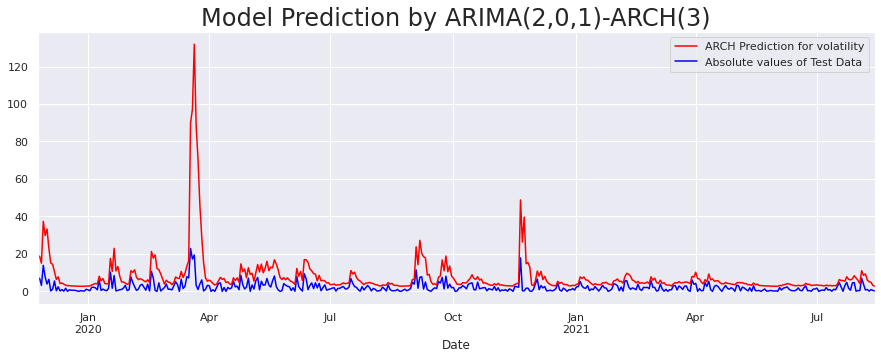

In [ ]:
arch_pred_full.residual_variance[start_date:end_date].plot(figsize=(15,5),color="red")
test.Return.abs().plot(color="blue",zorder=1)
plt.title("Model Prediction by ARIMA(2,0,1)-ARCH(3)",size=24)
plt.legend(['ARCH Prediction for volatility','Absolute values of Test Data'],loc = "upper right")
plt.show()

## **GARCH**

Start with GARCH(1,1)

In [ ]:
model_garch_1_1 = arch_model(Residual.ARIMA_Residual, mean = "Constant", vol = "GARCH",dist="Normal", p = 1, q = 1)
results_garch_1_1= model_garch_1_1.fit(last_obs='2019-11-25',update_freq=5)


Iteration:      5,   Func. Count:     40,   Neg. LLF: 3839.4694325553746
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3839.460615284098
            Iterations: 8
            Function evaluations: 58
            Gradient evaluations: 8


In [ ]:
results_garch_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:         ARIMA_Residual   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3839.46
Distribution:                  Normal   AIC:                           7686.92
Method:            Maximum Likelihood   BIC:                           7708.90
                                        No. Observations:                 1799
Date:                Tue, Nov 16 2021   Df Residuals:                     1798
Time:                        05:26:51   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0399  4.572e-02      0.874      0.382 [-4.967e-02,  0.130]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.5346      0.227      2.353  1.862e-02 [8.932e-02,  0.980]
alpha[1]       0.1109  3.672e-02      3.020  2.531e-03 [3.891e-02,  0.183]
beta[1]        0.7722  7.793e-02      9.909  3.817e-23   [  0.619,  0.925]
==========================================================================

Covariance estimator: robust
"""

$\alpha_1$ and $\beta_1$ both are significant . Now er fit GARCH(1,2)

In [ ]:
model_garch_1_2 = arch_model(Residual.ARIMA_Residual, mean = "Constant", vol = "GARCH",dist="Normal", p = 1, q = 2)
results_garch_1_2= model_garch_1_2.fit(last_obs='2019-11-25',update_freq=5)


Iteration:      5,   Func. Count:     43,   Neg. LLF: 3838.6608483699124
Iteration:     10,   Func. Count:     81,   Neg. LLF: 3838.1627471236793
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3838.1627154811836
            Iterations: 12
            Function evaluations: 95
            Gradient evaluations: 12


In [ ]:
results_garch_1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:         ARIMA_Residual   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3838.16
Distribution:                  Normal   AIC:                           7686.33
Method:            Maximum Likelihood   BIC:                           7713.80
                                        No. Observations:                 1799
Date:                Tue, Nov 16 2021   Df Residuals:                     1798
Time:                        05:26:51   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0327  4.671e-02      0.699      0.484 [-5.889e-02,  0.124]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.5887      0.239      2.463  1.377e-02   [  0.120,  1.057]
alpha[1]       0.1394  4.027e-02      3.463  5.346e-04 [6.051e-02,  0.218]
beta[1]        0.2255      0.418      0.539      0.590   [ -0.594,  1.045]
beta[2]        0.5074      0.451      1.126      0.260   [ -0.376,  1.390]
==========================================================================

Covariance estimator: robust
"""

$\beta_2$ is insignificant . So now we fit GARCH(2,1)

In [ ]:
model_garch_2_1 = arch_model(Residual.ARIMA_Residual, mean = "Constant", vol = "GARCH",dist="Normal", p = 2, q = 1)
results_garch_2_1= model_garch_2_1.fit(last_obs='2019-11-25',update_freq=5)


Iteration:      5,   Func. Count:     45,   Neg. LLF: 3841.9236871597095
Iteration:     10,   Func. Count:     81,   Neg. LLF: 3839.4612840620775
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3839.460615262416
            Iterations: 12
            Function evaluations: 95
            Gradient evaluations: 12


In [ ]:
results_garch_2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:         ARIMA_Residual   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3839.46
Distribution:                  Normal   AIC:                           7688.92
Method:            Maximum Likelihood   BIC:                           7716.40
                                        No. Observations:                 1799
Date:                Tue, Nov 16 2021   Df Residuals:                     1798
Time:                        05:26:51   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0399  4.612e-02      0.866      0.386 [-5.045e-02,  0.130]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.5346      0.353      1.513      0.130   [ -0.158,  1.227]
alpha[1]       0.1109  3.662e-02      3.028  2.466e-03 [3.910e-02,  0.183]
alpha[2]   6.9086e-14  5.433e-02  1.272e-12      1.000   [ -0.106,  0.106]
beta[1]        0.7722      0.127      6.092  1.118e-09   [  0.524,  1.021]
==========================================================================

Covariance estimator: robust
"""

$\alpha_2$ is insignificant. Hence we stick to GARCH(1,1)

In [ ]:
garch_pred = results_garch_1_1.forecast(horizon=1, start='2019-11-25')


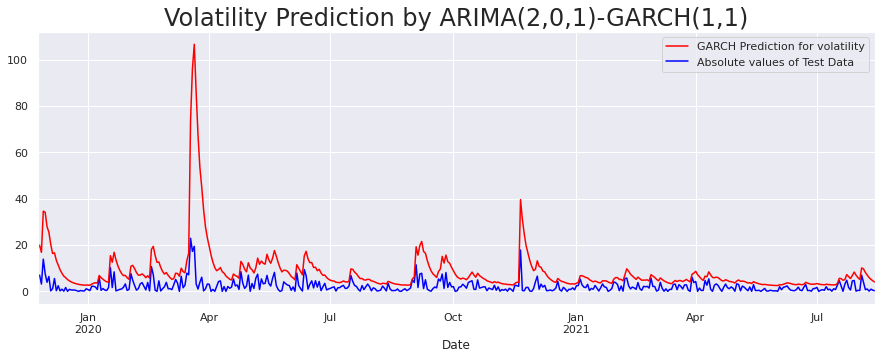

In [ ]:
garch_pred.residual_variance[start_date:end_date].plot(figsize=(15,5),color="red")
test.Return.abs().plot(color="blue",zorder=1)
plt.title("Volatility Prediction by ARIMA(2,0,1)-GARCH(1,1)",size=24)
plt.legend(['GARCH Prediction for volatility','Absolute values of Test Data'],loc = "upper right")
plt.show()